<a href="https://colab.research.google.com/github/OptimoCX/BootCampIA/blob/main/ANN_ClasificadorAgua_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de la Calidad de Agua
**Descripción del dataset**

Este dataset contiene registros de distintas muestras de agua, donde se han medido concentraciones de diversos elementos químicos, compuestos y microorganismos, tales como:

Metales pesados: aluminium, arsenic, barium, cadmium, chromium, copper, lead, mercury, uranium, silver, etc.

Compuestos químicos: ammonia, chloramine, nitrates, nitrites, flouride, perchlorat, etc.

Microorganismos: bacteria, viruses

Otros elementos: selenium, radium

Cada fila representa una muestra de agua con las respectivas concentraciones de estas sustancias, y una columna final llamada is_safe indica si el agua es segura (1) o no segura (0) para el consumo humano

# Objetivo del modelo
Este es un problema de clasificación binaria, donde:

Entrada (features): Las columnas con concentraciones de sustancias químicas y microorganismos (variables numéricas continuas).

Salida (target): La variable is_safe, que toma el valor:

1 si el agua es segura.

0 si el agua no es segura.

## Importar librerias


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mkdir data # Crear Carpeta en directorio de Colab

In [ ]:
cd data # Se ingresa a la carpeta creada

[Errno 2] No such file or directory: 'data # Se ingresa a la carpeta creada'
/content


## Leer data

In [ ]:
df = pd.read_csv('/content/data/waterQuality.csv') # Lectura del archivo que contiene los features

In [ ]:
df.head() # Muestra las primeras 5 instancias del dataset

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [ ]:
df.shape # Describe el tamaño del dataset, 7999 instancias , 21 features

(7999, 21)

In [ ]:
df.info() # Describe información general acerca del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [ ]:
df['is_safe'].unique() # Verificar valores que contiene la columna Objetivo

array(['1', '0', '#NUM!'], dtype=object)

In [ ]:
df = df[df['is_safe'] != '#NUM!'] # Limpian los datos eliminando valores inválidos ('#NUM!').

# Aseguran que los tipos de datos (float e int) estén correctamente definidos para análisis y modelado.
df['ammonia'] = df['ammonia'].astype('float')
df['is_safe'] = df['is_safe'].astype('int')

/tmp/ipython-input-9-2954080250.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ammonia'] = df['ammonia'].astype('float')
/tmp/ipython-input-9-2954080250.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_safe'] = df['is_safe'].astype('int')


## Examinar datos nulos

## Identificando los features predictores (X) y el feature objetivo o a predecir (Y)

In [ ]:
x = df.iloc[:, :-1] # Selecciona todas las columnas excepto la última (:-1) del DataFrame df.
y = pd.DataFrame(df['is_safe']) # Extrae la columna is_safe del DataFrame df. La convierte explícitamente en un nuevo DataFrame, no solo una Serie (aunque no es estrictamente necesario para muchos modelos).

In [ ]:
x.head() # Visualizar las primeras cinco instancias del set de datos especifico de los features predictores.

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02


## Escalar los datos

### Uso de Función Estándar para Escalar

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
'''
StandardScaler:
Esta clase de sklearn escala tus variables para que tengan:

Media (mean) = 0

Desviación estándar (std) = 1

'''

'\nStandardScaler:\nEsta clase de sklearn escala tus variables para que tengan:\n\nMedia (mean) = 0\n\nDesviación estándar (std) = 1\n\n'

In [ ]:
x_scaled = sc.fit_transform(x) # Es una versión escalada (normalizada) del DataFrame original x.

In [ ]:
pd.DataFrame(x_scaled) # Convierte los datos escalados en un nuevo DataFrame para poder visualizarlos mejor.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.777403,-0.585491,-0.480875,1.054205,-0.993241,-0.711941,2.152993,-0.973050,-1.657446,-0.363345,-0.869387,-0.781070,1.129767,-0.348629,0.609178,1.203362,1.661842,1.053694,1.338736,-0.917040
1,1.306945,0.775118,-0.599632,1.432447,-1.131948,1.208552,1.598765,-0.223303,0.294799,1.002460,0.849782,0.009785,-1.409197,1.046960,-0.739005,0.892977,0.124811,1.053694,0.851134,0.198023
2,0.271572,-0.029083,-0.480875,-0.812340,-0.965499,0.803417,1.044536,-1.202564,0.501507,-0.818614,-0.861452,-0.368450,0.783298,-0.383518,0.272132,1.911763,1.786699,0.706129,2.035310,-1.288728
3,0.548198,-0.332067,-0.480875,1.144654,-1.159690,1.968179,-0.802892,1.306793,0.708215,1.184567,1.008475,-1.434385,-1.517469,-0.069511,-0.401960,-0.415275,-0.516695,-1.031700,2.104968,0.198023
4,0.200439,1.132165,-0.520460,-1.124801,-1.020982,0.191820,1.635713,-0.361012,-0.371261,-0.575804,-0.866742,0.302058,-0.555658,-0.383518,-0.739005,0.024578,-0.219622,-1.031700,-0.611672,-0.917040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,-0.487175,-0.731915,-0.639217,0.314165,-0.077771,-0.809330,-0.802892,-1.187263,1.374275,-0.970370,-0.869387,1.677459,0.806757,-0.575412,-0.064914,-0.729052,-0.340173,1.401260,-0.611672,-0.545353
7992,-0.487175,1.119776,-0.560046,-0.804117,-0.910016,-0.672986,-0.839840,-1.202564,1.626919,-0.970370,-0.869387,-1.176498,0.081339,-0.575412,-1.413097,-0.847213,-0.779325,1.401260,-0.333042,1.313085
7993,-0.455561,-0.836663,-0.639217,-0.787672,-0.355186,-0.828807,-0.728995,-1.202564,0.317766,-0.970370,-0.869387,1.419571,1.100895,-0.575412,-1.750143,-0.854563,0.826593,-1.726831,-0.750986,0.198023
7994,-0.518790,-0.481869,-0.599632,0.355278,-1.187431,-0.069180,-0.913738,-1.095458,-1.772284,-0.970370,-0.869387,-1.709466,-1.771906,-2.319897,-1.750143,-0.930887,-1.257225,-1.726831,-1.029616,-1.660415


**¿Por qué es importante escalar?**

✅ 1. Para evitar que las variables con mayores rangos dominen el modelo
Ejemplo: nitrates puede ir de 0 a 50, mientras que lead puede ir de 0 a 0.2.

Sin escalar, el modelo podría darle más peso a los valores grandes solo por su magnitud.

✅ 2. Muchos modelos asumen o requieren que los datos estén escalados:
K-Nearest Neighbors (KNN)

Support Vector Machines (SVM)

Redes Neuronales

Regresión logística / lineal

PCA (análisis de componentes principales)

✅ 3. Mejora la velocidad de entrenamiento y la convergencia en modelos como redes neuronales o regresión.

## División del set de entrenamiento y de evaluación.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 0)
'''
¿Qué hace random_state?
Establece una semilla aleatoria que controla cómo se divide el conjunto de datos.

Sirve para garantizar que la división entre entrenamiento y prueba sea reproducible cada vez que se ejecute el código.
'''

'\n¿Qué hace random_state?\nEstablece una semilla aleatoria que controla cómo se divide el conjunto de datos.\n\nSirve para garantizar que la división entre entrenamiento y prueba sea reproducible cada vez que se ejecute el código.\n'

## Revisión del Set de Entrenamiento

In [ ]:
n_samples = x_train.shape[0]
n_features = x_train.shape[1]
print(f'n_samples: {n_samples}, n_features: {n_features}')

'''
6396 Corresponde al 80% de los datos totales que se cuentan para entrenar
20 features ya que se excluye la columna de la variable objetivo
'''


n_samples: 6396, n_features: 20


'\n6396 Corresponde al 80% de los datos totales que se cuentan para entrenar\n20 features ya que se excluye la columna de la variable objetivo\n'

## Construcción de la Red Neuronal tomando como base Sequencial de KERAS

In [ ]:
# En Colab por ahora es necesario asegurar que la libreria KERAS quede instalada con todos los paquetes requeridos
!pip install keras

In [ ]:
# Importando Keras con librerias y paquetes
from keras.layers import Dense
from keras.models import Sequential
'''
Sequential, es una forma simple y directa de construir redes neuronales en Keras (que forma parte de TensorFlow).
Se llama "secundial" porque los capas se añaden una tras otra, en orden, como una pila lineal.

Usas Sequential cuando tu modelo es un bloque lineal de capas, es decir:

Cada capa tiene exactamente una entrada y una salida.

No hay bifurcaciones, combinaciones, ni conexiones múltiples entre capas.

Si necesitas modelos más complejos (por ejemplo, con múltiples entradas o salidas), debes usar la Functional API o incluso Model Subclassing también dentro de KERAS

'''


'\nSequential, es una forma simple y directa de construir redes neuronales en Keras (que forma parte de TensorFlow).\nSe llama "secundial" porque los capas se añaden una tras otra, en orden, como una pila lineal.\n\nUsas Sequential cuando tu modelo es un bloque lineal de capas, es decir:\n\nCada capa tiene exactamente una entrada y una salida.\n\nNo hay bifurcaciones, combinaciones, ni conexiones múltiples entre capas.\n\nSi necesitas modelos más complejos (por ejemplo, con múltiples entradas o salidas), debes usar la Functional API o incluso Model Subclassing también dentro de KERAS\n\n'

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Input

# Inicializar el modelo secuencial
my_classifier = Sequential()

# Capa de entrada + primera capa oculta
my_classifier.add(Input(shape=(n_features,)))  # n_features: número de variables predictoras
my_classifier.add(Dense(units=16, activation='relu'))  # Capa oculta 1

# Segunda capa oculta: permite a la red aprender patrones más profundos
my_classifier.add(Dense(units=8, activation='relu'))

# Tercera capa oculta: añade más capacidad de aprendizaje no lineal
my_classifier.add(Dense(units=20, activation='relu'))

# Capa de salida: para clasificación binaria, se usa sigmoid
my_classifier.add(Dense(units=1, activation='sigmoid'))


| Capa | Tipo                 | Neuronas | Rol clave                                           |
| ---- | -------------------- | -------- | --------------------------------------------------- |
| 1    | Entrada + 1ra oculta | 16       | Extraer relaciones básicas entre características    |
| 2    | Oculta intermedia    | 8        | Aprender interacciones más complejas                |
| 3    | Oculta ampliada      | 20       | Capturar patrones profundos y no evidentes          |
| 4    | Salida (`sigmoid`)   | 1        | Generar probabilidad de clase (seguro vs no seguro) |


## Gráficar la arquitectura de la Red Neuronal

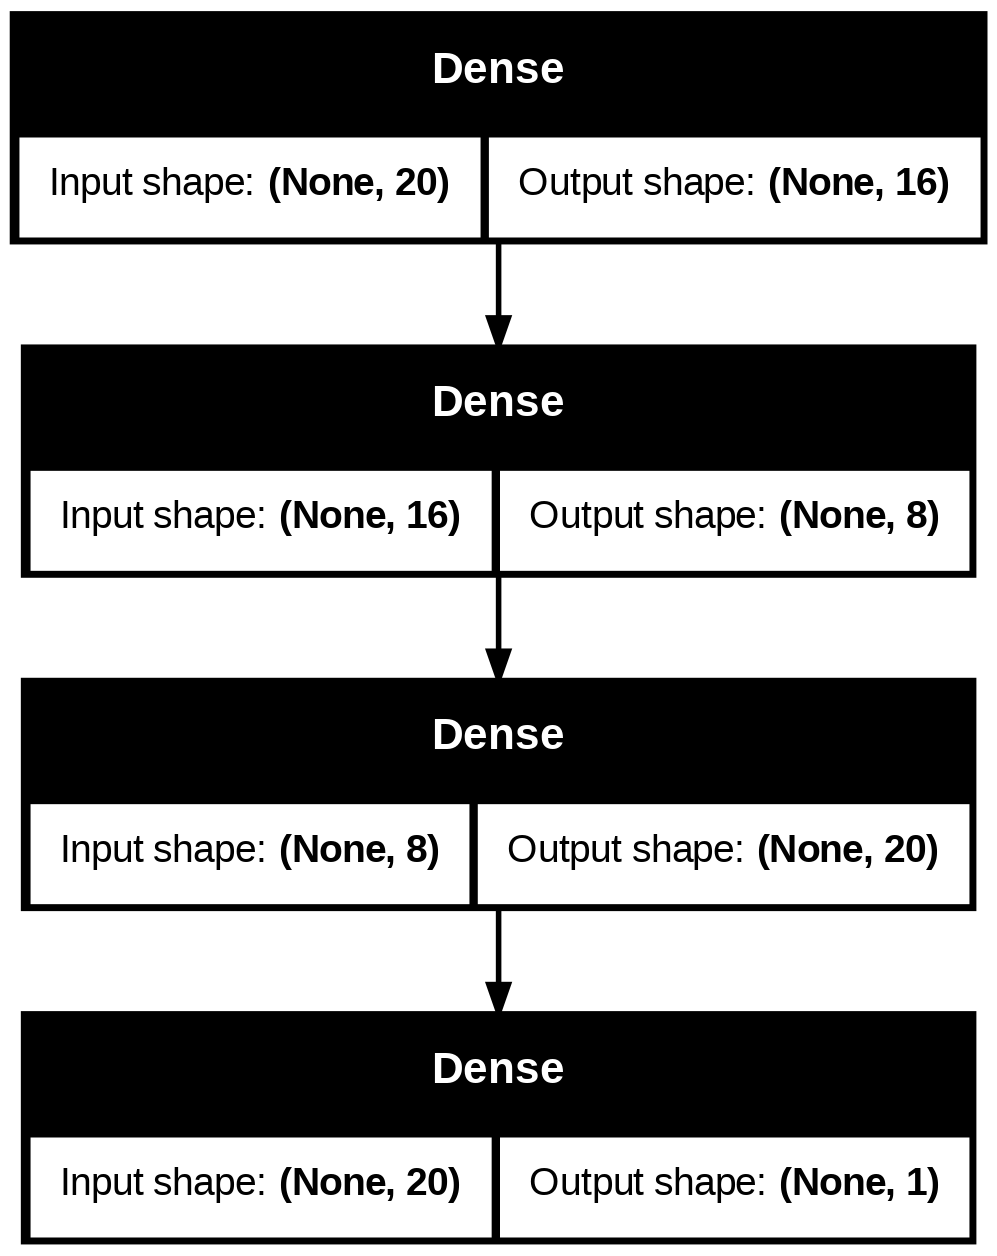

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(my_classifier, to_file='model.png', show_shapes=True) # Esta línea genera una imagen visual del modelo que estás construyendo (en este caso, my_classifier) y la guarda como un archivo .png.

## Compilar la Red Neuronal Artificial - ANN (Artificial Neural Network)

In [ ]:
my_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['accuracy'])
'''
Compilar es esencial en Keras porque le indica al modelo cómo debe aprender. Aquí se define el algoritmo de optimización, la función de pérdida y las métricas de evaluación que usará durante el entrenamiento.

¿Qué hace .compile()?
El método .compile() configura el modelo antes de entrenarlo. Le dice:

Cómo aprender (optimizer)

Qué tan mal lo está haciendo (loss)

Cómo medir el rendimiento (metrics)

'''

'\nCompilar es esencial en Keras porque le indica al modelo cómo debe aprender. Aquí se define el algoritmo de optimización, la función de pérdida y las métricas de evaluación que usará durante el entrenamiento.\n\n¿Qué hace .compile()?\nEl método .compile() configura el modelo antes de entrenarlo. Le dice:\n\nCómo aprender (optimizer)\n\nQué tan mal lo está haciendo (loss)\n\nCómo medir el rendimiento (metrics)\n\n'

# ¿Qué es un optimizador?

Un optimizador es un algoritmo que se encarga de ajustar los pesos internos de una red neuronal para que las predicciones del modelo mejoren.

✅ En cada paso del entrenamiento:

El modelo predice.

Se calcula el error (con la función de pérdida).

El optimizador ajusta los pesos para reducir ese error.

**¿Cómo lo hace?**
Usa técnicas basadas en gradientes (como el descenso del gradiente) para moverse en la dirección que minimiza el error.

## Experimento Base (0): Entrenar la red neuronal con el conjunto de entrenamiento

In [ ]:
history = my_classifier.fit(x_train, y_train, validation_split=0.2,
                            batch_size = 10, epochs = 100)

Epoch 1/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8762 - loss: 0.3772 - val_accuracy: 0.8891 - val_loss: 0.2740
Epoch 2/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9091 - loss: 0.2423 - val_accuracy: 0.9094 - val_loss: 0.2345
Epoch 3/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9176 - loss: 0.2084 - val_accuracy: 0.9148 - val_loss: 0.2138
Epoch 4/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9267 - loss: 0.1954 - val_accuracy: 0.9180 - val_loss: 0.2026
Epoch 5/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9256 - loss: 0.1950 - val_accuracy: 0.9148 - val_loss: 0.2005
Epoch 6/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9336 - loss: 0.1767 - val_accuracy: 0.9219 - val_loss: 0.1939
Epoch 7/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9317 - loss: 0.1748 - val_accuracy: 0.9250 - val_loss: 0.1843
Epoch 8/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9381 - loss: 0.1639 - val_accu

| Parámetro              | Qué hace                                                                                                                                                 |
| ---------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `x_train`              | Conjunto de entrada (features del entrenamiento).                                                                                                        |
| `y_train`              | Etiquetas (valores correctos) asociadas a `x_train`.                                                                                                     |
| `validation_split=0.2` | Usa el **20% del conjunto de entrenamiento** como datos de validación interna (no son usados para aprender, solo para verificar si está sobreajustando). |
| `batch_size=10`        | El modelo ajusta los pesos **cada 10 muestras**. Ayuda a que el aprendizaje sea más estable y rápido.                                                    |
| `epochs=100`           | El modelo verá **100 veces** todo el `x_train` (entrenamiento completo).                                                                                 |
| `history = ...`        | Guarda el historial del entrenamiento (accuracy, loss, etc. por época) en la variable `history`.                                                         |


## Realizar Predicciones
### Revisemos primero las predicciones en el set de Entrenamiento

In [ ]:
y_pred_train = my_classifier.predict(x_train)
y_pred_train = (y_pred_train > 0.5) # Umbral para decidir la salidas binarias del módelo


200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step


| Umbral          | Resultado                                  | Cuándo usarlo                         |
| --------------- | ------------------------------------------ | ------------------------------------- |
| `0.5` (default) | Asume neutralidad entre clases             | Cuando ambas clases tienen igual peso |
| `> 0.6 / 0.7`   | Más conservador (positivo si alta certeza) | Cuando falsos positivos son costosos  |
| `< 0.5`         | Más sensible (más positivos detectados)    | Cuando falsos negativos son costosos  |

### Visualizar las predicciones del módelo vs valores reales

In [ ]:
df_comparacion = pd.DataFrame(x_train)
df_comparacion['Real_Label'] = y_train.values
df_comparacion['Predicted_Label'] = y_pred_train.astype(int)

df_comparacion.head()


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,Real_Label,Predicted_Label
0,1.346463,0.763855,0.746281,1.720240,1.031890,1.348790,1.598765,-0.223303,0.294799,-0.970370,...,-1.266640,1.099294,-0.739005,1.932116,0.124811,1.053694,0.851134,0.198023,0,0
1,-0.479272,-0.639555,-0.282946,-0.549214,-0.910016,-0.778165,-0.876789,0.312231,-0.210488,-0.636506,...,0.949315,0.052603,0.272132,-0.665166,-0.925709,-1.726831,-0.333042,-1.288728,0,0
2,-0.479272,1.089365,-0.441289,-0.228531,-1.187431,-0.782061,-0.581200,0.174522,0.731183,1.305972,...,-0.683779,0.000268,1.283269,-0.829121,-0.878349,0.010997,-1.029616,-1.288728,0,0
3,-0.495079,-0.853558,-0.560046,-0.557437,0.477060,-0.828807,-0.655098,1.306793,-0.555002,-0.970370,...,-0.452800,0.453835,0.946224,-0.907707,-0.839600,1.053694,-1.029616,0.941398,0,0
4,-0.479272,0.662485,-0.401703,-0.705445,1.309305,-0.805434,-0.802892,1.337395,1.443178,-0.484750,...,0.191415,0.366610,-0.064914,-0.876612,-0.460724,1.401260,-0.681329,0.569710,0,0


### Guardar resultados en un archivo CSV o Excel para comparar los resultados

In [ ]:
df_comparacion.to_csv('predicciones_entrenamiento.csv', index=False)

### Predicciones en el set de Evaluación

In [ ]:
y_pred_test = my_classifier.predict(x_test)
y_pred_test = (y_pred_test > 0.5)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [ ]:
import pandas as pd

# Crear DataFrame con los datos de prueba
df_comparacion_test = pd.DataFrame(x_test)

# Añadir la etiqueta real
df_comparacion_test['Real_Label'] = y_test.values

# Añadir la etiqueta predicha (convertida a 0 o 1 si es necesario)
df_comparacion_test['Predicted_Label'] = y_pred_test.astype(int)

# Mostrar las primeras filas
df_comparacion_test.head()


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,Real_Label,Predicted_Label
0,-0.479272,0.073413,-0.441289,1.695572,-0.993241,2.166850,1.672662,1.383298,-0.279391,0.972108,...,-1.228745,0.610838,-1.076051,0.118429,0.421884,0.010997,1.826338,-0.173665,0,0
1,2.310704,-1.144152,0.865038,-0.516324,-0.077771,1.231925,0.933690,1.184385,-1.473706,1.973699,...,0.398935,-0.348629,0.272132,-0.660643,-0.899876,0.358563,0.572505,1.313085,0,0
2,-0.471368,1.556793,-0.480875,-1.083687,-0.910016,-0.770374,-0.876789,0.878366,-0.325326,1.973699,...,-1.080774,0.104937,-0.401960,-0.906011,-1.132368,-0.336568,-0.959959,0.569710,0,0
3,0.556102,0.443976,-0.635259,1.794244,-1.020982,-0.750897,0.748948,1.796424,-1.129192,1.730889,...,-0.079264,0.174717,0.609178,2.364620,-0.456419,-1.031700,0.084903,-0.545353,0,0
4,-0.487175,-1.576664,2.567222,2.049147,1.031890,2.279821,0.083874,1.429201,-0.945451,-0.332994,...,-0.954457,1.256298,-1.076051,2.257766,-0.266981,0.358563,0.502847,0.569710,0,0


### Construyendo la Mátrix de Confusión

In [ ]:
# Calcular e imprimir accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy del modelo: {accuracy:.4f}")


Accuracy del modelo: 0.9369


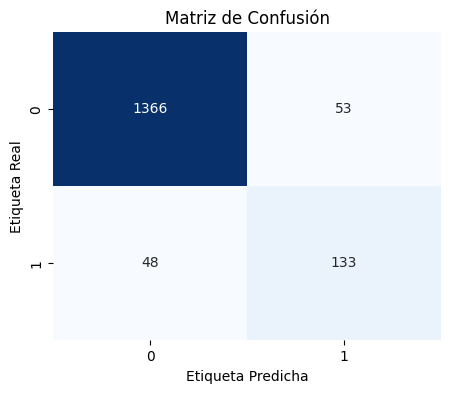

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_test)

# Graficar
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()


### Conclusiones de los Resultados

Conclusiones:

1. El modelo tiene alta exactitud global (~93%), lo cual es muy bueno.

2. La clase mayoritaria (0) es predicha con mayor precisión (TN = 1366), lo que puede indicar cierto sesgo hacia la clase negativa.

3. A pesar de eso, la clase minoritaria (1) tiene un recall aceptable (~73%), es decir, el modelo logra identificar buena parte de los casos seguros.

4. El modelo podría mejorar en precisión, ya que hay 53 falsos positivos (casos no seguros predichos como seguros), lo cual puede ser crítico si el objetivo es garantizar seguridad del agua.

### Recomendaciones posibles:

1. Revisar el umbral de clasificación (actualmente 0.5) → podrías bajarlo a 0.4 para ver si mejora el recall.

2. Probar con técnicas de balanceo si hay desbalance de clases (como SMOTE o undersampling).

3. Ajustar la arquitectura del modelo o probar regularización.

### Gráfica de la precisión(accuracy) tanto para el conjunto de entrenamiento como para el de validación

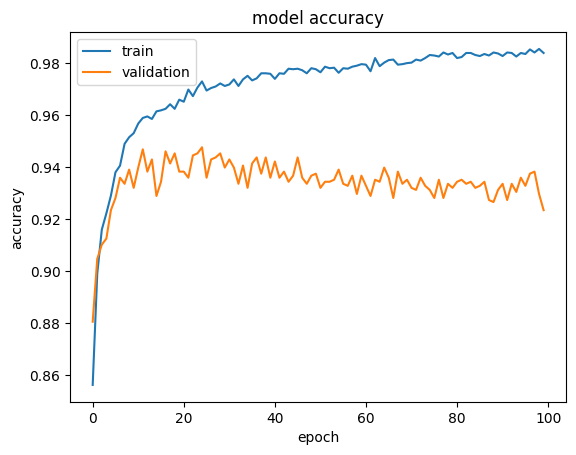

In [ ]:
plt.subplots()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

### Análisis de la Gráfica:

Interpretación:
Inicio (épocas 0–10):

La precisión mejora rápidamente en ambos conjuntos. El modelo está aprendiendo patrones útiles.

Medio (épocas ~10–30):

La precisión en entrenamiento sigue mejorando.

La precisión en validación se estanca y fluctúa (normal).

Después (épocas ~30–100):

La precisión del entrenamiento sigue subiendo, casi alcanza 99%.

Pero la precisión en validación no mejora más e incluso tiene una ligera tendencia a bajar.


### Conclusión principal:

Hay señales de sobreajuste (overfitting):
El modelo memoriza los datos de entrenamiento, pero no generaliza tan bien con datos nuevos.

Lo vemos porque hay una brecha creciente entre la precisión de entrenamiento y la de validación.

### Gráfica de la perdida tanto para el conjunto de entrenamiento como para el de validación

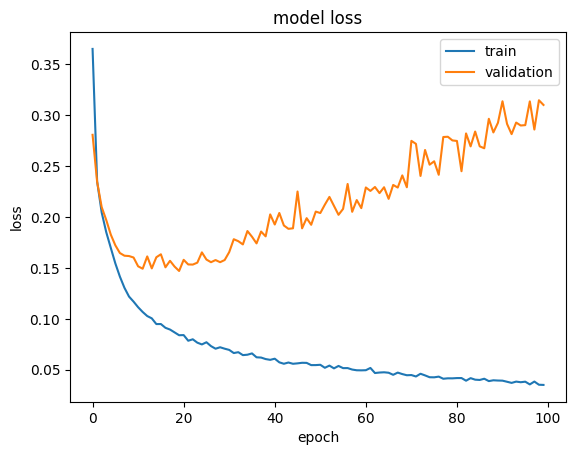

In [ ]:
plt.subplots()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

### Análisis de la gráfica:

Hay sobreajuste (overfitting) a partir de la época ~15–20:

La pérdida en validación empieza a subir mientras que la del entrenamiento sigue bajando.

El modelo ya no está mejorando su capacidad para generalizar y solo mejora sobre los datos que ya conoce.

### Experimento 1: Empecemos a trabajar para reducir el Overfitting

### Estrategias para reducit el Overfitting



| Estrategia                             | ¿Qué hace?                                                     | ¿Cómo ayuda?                                          |
| -------------------------------------- | -------------------------------------------------------------- | ----------------------------------------------------- |
| **EarlyStopping**                      | Detiene el entrenamiento cuando la validación deja de mejorar. | Evita el entrenamiento excesivo.                      |
| **Dropout**                            | Apaga aleatoriamente neuronas durante el entrenamiento.        | Fuerza al modelo a generalizar mejor.                 |
| **Regularización (L1/L2)**             | Penaliza pesos grandes en las neuronas.                        | Reduce la complejidad del modelo.                     |
| **Reducir complejidad**                | Disminuye el número de capas o neuronas.                       | Previene que el modelo aprenda patrones irrelevantes. |
| **Más datos de entrenamiento**         | Aumenta el tamaño del dataset real o sintético.                | Mejora la capacidad del modelo para generalizar.      |
| **Ajustar learning rate / batch size** | Cambia la velocidad de aprendizaje o el tamaño del lote.       | Estabiliza y mejora el proceso de entrenamiento.      |


### Experimentando adicionando Regularización L2

Empezar por regularización es inteligente porque:

Es rápido,

No requiere rediseñar,

Mejora la capacidad del modelo para generalizar,

Y te da una primera defensa efectiva contra el sobreajuste.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.regularizers import l2

my_classifier = Sequential()

# Entrada explícita
my_classifier.add(Input(shape=(n_features,)))

# Capa oculta 1 con regularización L2
my_classifier.add(Dense(units=16,
                        activation='relu',
                        kernel_regularizer=l2(0.001)))

# Capa oculta 2
my_classifier.add(Dense(units=8,
                        activation='relu',
                        kernel_regularizer=l2(0.001)))

# Capa de salida
my_classifier.add(Dense(units=1, activation='sigmoid'))

# Compilar
my_classifier.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])


In [ ]:
history = my_classifier.fit(x_train, y_train, validation_split=0.2,
                            batch_size = 10, epochs = 100)

Epoch 1/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7562 - loss: 0.5059 - val_accuracy: 0.8961 - val_loss: 0.2932
Epoch 2/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9020 - loss: 0.2777 - val_accuracy: 0.9094 - val_loss: 0.2571
Epoch 3/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9197 - loss: 0.2412 - val_accuracy: 0.9219 - val_loss: 0.2372
Epoch 4/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9256 - loss: 0.2117 - val_accuracy: 0.9211 - val_loss: 0.2230
Epoch 5/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9340 - loss: 0.2025 - val_accuracy: 0.9273 - val_loss: 0.2090
Epoch 6/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9375 - loss: 0.1889 - val_accuracy: 0.9320 - val_loss: 0.2052
Epoch 7/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9414 - loss: 0.1813 - val_accuracy: 0.9391 - val_loss: 0.1959
Epoch 8/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9472 - loss: 0.1649 - val_accu

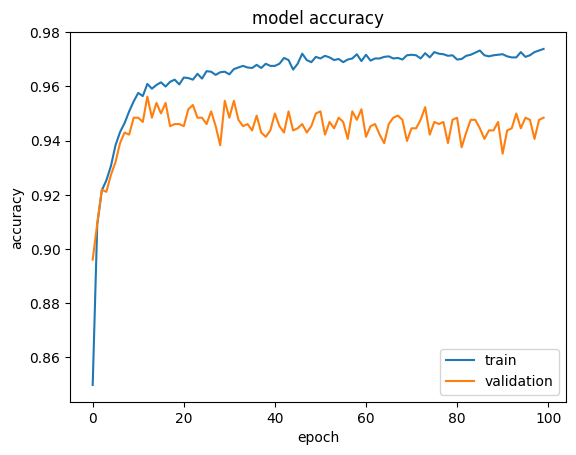

In [ ]:
plt.subplots()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

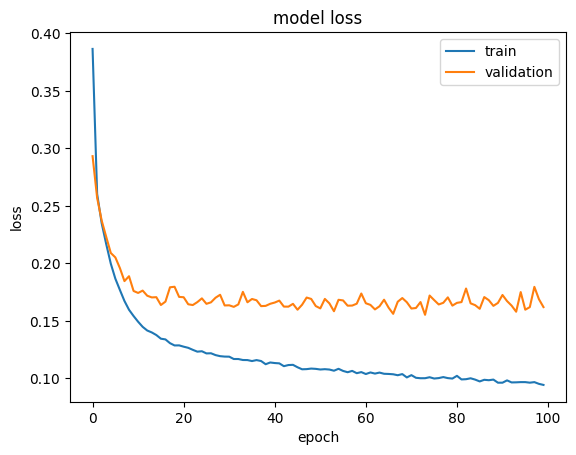

In [ ]:
plt.subplots()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# Predecir sobre el conjunto de prueba
y_pred_test = my_classifier.predict(x_test)

# Convertir las probabilidades a clases 0 o 1
y_pred_test = (y_pred_test > 0.5).astype(int)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
# Calcular e imprimir accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy del modelo: {accuracy:.4f}")

Accuracy del modelo: 0.9500


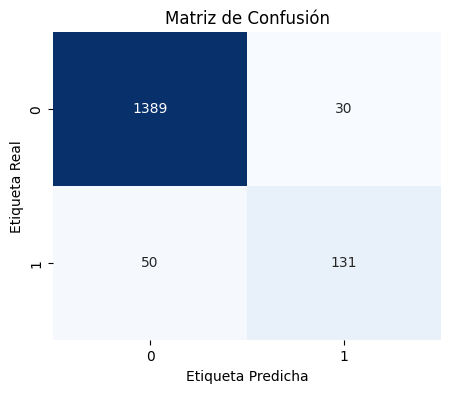

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_test)

# Graficar
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()

### Conclusiones

1. Alto rendimiento general (95%), lo cual indica que el modelo está haciendo un buen trabajo general en la clasificación.

2. Falsa alarma moderada: 30 negativos se clasificaron erróneamente como positivos.

3. Faltan detectar algunos positivos reales (50 falsos negativos), lo cual podría ser importante dependiendo del contexto del problema (por ejemplo, si se trata de detectar aguas no seguras).

### Experimento 2: Empecemos a implementar EarlyStopping y Dropout

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

# Inicializar el modelo
my_classifier = Sequential()

# Capa de entrada + capa oculta 1 con L2 y Dropout
my_classifier.add(Input(shape=(n_features,)))
my_classifier.add(Dense(units=16, activation='relu', kernel_regularizer=l2(0.001)))
my_classifier.add(Dropout(0.2))  # Apaga el 20% de neuronas aleatoriamente en entrenamiento

# Capa oculta 2 con L2
my_classifier.add(Dense(units=8, activation='relu', kernel_regularizer=l2(0.001)))

# Capa de salida
my_classifier.add(Dense(units=1, activation='sigmoid'))

# Compilar modelo
my_classifier.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

# Definir EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           verbose=1)

# Entrenar el modelo
history = my_classifier.fit(x_train, y_train,
                            validation_split=0.2,
                            epochs=100,
                            batch_size=10,
                            callbacks=[early_stop])


Epoch 1/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7640 - loss: 0.5275 - val_accuracy: 0.8805 - val_loss: 0.3191
Epoch 2/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8920 - loss: 0.3112 - val_accuracy: 0.8844 - val_loss: 0.2747
Epoch 3/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9004 - loss: 0.2743 - val_accuracy: 0.9109 - val_loss: 0.2455
Epoch 4/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9054 - loss: 0.2617 - val_accuracy: 0.9187 - val_loss: 0.2342
Epoch 5/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9118 - loss: 0.2424 - val_accuracy: 0.9242 - val_loss: 0.2245
Epoch 6/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9243 - loss: 0.2186 - val_accuracy: 0.9289 - val_loss: 0.2155
Epoch 7/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9247 - loss: 0.2209 - val_accuracy: 0.9312 - val_loss: 0.2096
Epoch 8/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9276 - loss: 0.2080 - val_accu

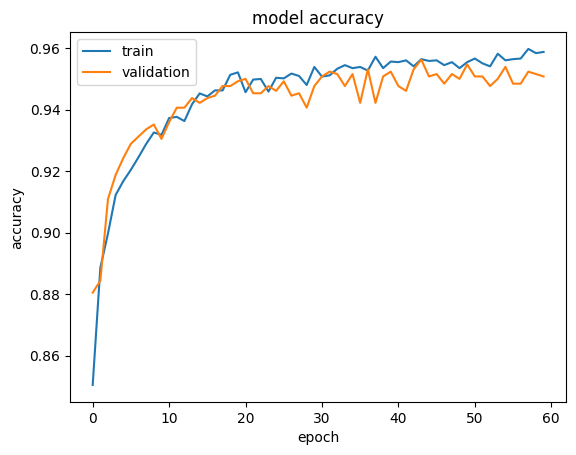

In [ ]:
plt.subplots()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

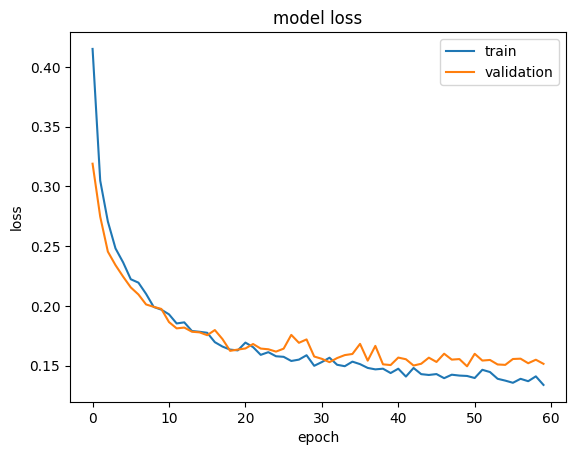

In [ ]:
plt.subplots()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# Predecir sobre el conjunto de prueba
y_pred_test = my_classifier.predict(x_test)

# Convertir las probabilidades a clases 0 o 1
y_pred_test = (y_pred_test > 0.5).astype(int)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [ ]:
# Calcular e imprimir accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy del modelo: {accuracy:.4f}")

Accuracy del modelo: 0.9550


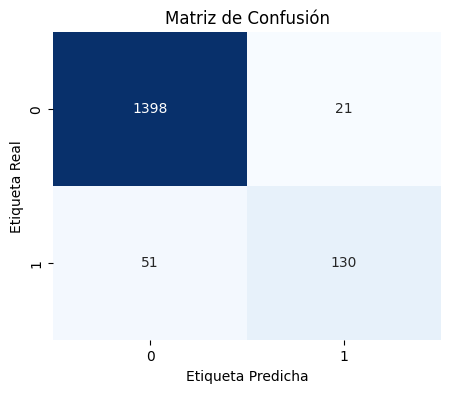

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_test)

# Graficar
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()

### Conclusiones:


1. Mejoría en precisión positiva: Solo 21 falsos positivos (↓).

2. Aún hay falsos negativos: 51 positivos reales se clasificaron como negativos.

3. F1-score y recall mejorables si el objetivo es detectar todos los positivos.

4. El modelo logra un buen balance entre precisión y exactitud, lo cual es útil si ambos errores (falsos positivos y negativos) tienen costo.

### Experimentando adicionando Dropout

In [ ]:
from keras.layers import Dropout

In [ ]:
# Definir e inicializar el modelo
my_classifier = Sequential()

# Añadir la capa de entrada y la primera capa oculta
my_classifier.add(Dense(units=16, activation='relu', input_dim=n_features))

# Añadir una capa de Dropout para reducir el sobreajuste
my_classifier.add(Dropout(0.3))

# Añadir la segunda capa oculta
my_classifier.add(Dense(units=8, activation='relu'))

# Añadir la capa de salida (para clasificación binaria)
my_classifier.add(Dense(units=1, activation='sigmoid'))

# Compilar el modelo: define el optimizador, la función de pérdida y la métrica
my_classifier.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = my_classifier.fit(x_train, y_train, validation_split=0.2,
                            batch_size = 10, epochs = 100)

Epoch 1/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8498 - loss: 0.4260 - val_accuracy: 0.8805 - val_loss: 0.2998
Epoch 2/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8798 - loss: 0.3093 - val_accuracy: 0.8805 - val_loss: 0.2691
Epoch 3/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8866 - loss: 0.2724 - val_accuracy: 0.8852 - val_loss: 0.2491
Epoch 4/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8995 - loss: 0.2512 - val_accuracy: 0.9062 - val_loss: 0.2356
Epoch 5/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9082 - loss: 0.2271 - val_accuracy: 0.9109 - val_loss: 0.2290
Epoch 6/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9042 - loss: 0.2344 - val_accuracy: 0.9109 - val_loss: 0.2236
Epoch 7/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9091 - loss: 0.2257 - val_accuracy: 0.9133 - val_loss: 0.2203
Epoch 8/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9057 - loss: 0.2227 - val_accu

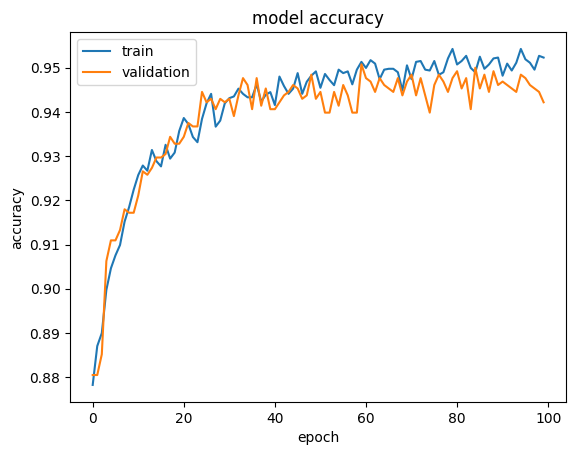

In [ ]:
# Plot the accuracy for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

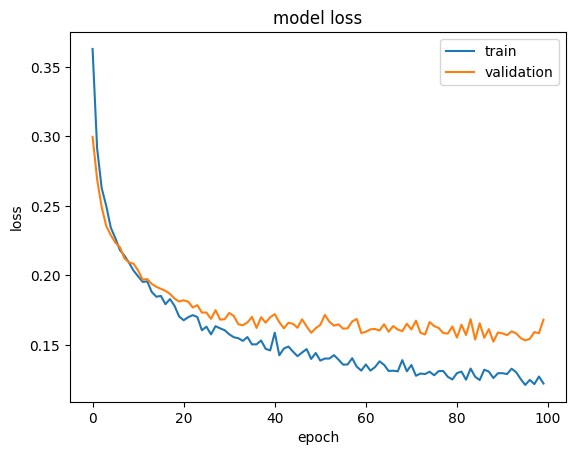

In [ ]:
# Plot the loss for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# Predecir sobre el conjunto de prueba
y_pred_test = my_classifier.predict(x_test)

# Convertir las probabilidades a clases 0 o 1
y_pred_test = (y_pred_test > 0.5).astype(int)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [ ]:
# Calcular e imprimir accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy del modelo: {accuracy:.4f}")

Accuracy del modelo: 0.9400


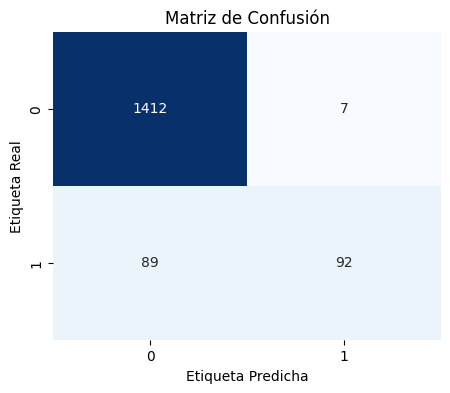

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_test)

# Graficar
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()

1. Alta precisión (94%): Cuando el modelo dice que el agua es apta, casi siempre acierta.

2. Precisión general (accuracy) es muy buena (94%).

3. Pero... el recall es bajo (51%), lo que indica que el modelo está fallando en detectar muchos casos de agua apta (FN = 89).

4. Esto no es ideal si quieres evitar rechazar agua que sí es apta, por ejemplo si esto impide su distribución o tratamiento innecesario.

**Experimento extra propuesto: **


 Vamos a suponer que te has reunido con el equipo interesado en el proyecto y les has presentado los resultados y como recomendación te sugieren seguir trabajando en reducir los falsos positivos. Cómo plantearías este ejercicio? Cómo plantearías la arquitectura de la red?